<br><p style="font-family: Calibri; font-size:2.75em;color:olive;">Research on <b>Prediction of Used Vehicle Price</b> in USA</p><br>

In [52]:
# Basic libraries to handle data
import pandas as lib_pd
import matplotlib.pyplot as lib_plt
import seaborn as lib_sns
import numpy as lib_np

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet

# For training and testing
from sklearn.model_selection import train_test_split
from sklearn import metrics

# For categorical to numeric
from sklearn import preprocessing
from math import sqrt

# Set the format for decimals
lib_pd.options.display.float_format = '{:,.3f}'.format

<br><p style="font-family: Calibri; font-size:2.25em;color:navy;">Acquire: Load the data about used vehicles</p>

In [53]:
df_vehicles = lib_pd.read_csv('./Used_Vehicles_USA.csv', sep=',')
print("Number of records: {0}".format(df_vehicles.shape[0]))
print("Number of columns: {0}".format(df_vehicles.shape[1]))

Number of records: 435849
Number of columns: 25


In [54]:
list(df_vehicles)

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'vin',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long']

In [55]:
# Count null values in df_vehicles
def PrintNullValueStats():
    null_values = df_vehicles.isnull().sum()
    null_values = lib_pd.DataFrame(null_values, columns=['null_count'])
    count_rows = len(df_vehicles)
    null_values['null_perc'] = null_values['null_count'] / count_rows * 100
    print(null_values.sort_values('null_perc', ascending = False))

In [56]:
PrintNullValueStats()

              null_count  null_perc
county            435849    100.000
size              295961     67.904
vin               196652     45.119
condition         186806     42.860
cylinders         166384     38.175
paint_color       135247     31.031
drive             122011     27.994
type              117108     26.869
odometer           75148     17.242
manufacturer       20747      4.760
long                8235      1.889
lat                 8235      1.889
model               6199      1.422
fuel                2991      0.686
transmission        2146      0.492
title_status        1806      0.414
year                1117      0.256
description           27      0.006
image_url             24      0.006
url                    0      0.000
price                  0      0.000
region_url             0      0.000
state                  0      0.000
region                 0      0.000
id                     0      0.000


<br><p style="font-family: Calibri; font-size:2.25em;color:navy;">Prepare: Drop columns that has mostly NaNs or not relevant for research</p>

In [57]:
columns_with_high_nans = ['county','size','vin','cylinders', 'paint_color', 'drive', 'type']
df_vehicles = df_vehicles.drop(columns=columns_with_high_nans, axis=1)

In [58]:
columns_not_relevant_for_research = ['id', 'region_url', 'url', 'description', 'image_url']
df_vehicles = df_vehicles.drop(columns=columns_not_relevant_for_research, axis=1)

In [59]:
PrintNullValueStats()

              null_count  null_perc
condition         186806     42.860
odometer           75148     17.242
manufacturer       20747      4.760
lat                 8235      1.889
long                8235      1.889
model               6199      1.422
fuel                2991      0.686
transmission        2146      0.492
title_status        1806      0.414
year                1117      0.256
region                 0      0.000
price                  0      0.000
state                  0      0.000


In [60]:
# condition is an important column but it has lot of NaNs hence fill with new (for 2018+) and remaining blank as unknown
new_vehicle_filter = (df_vehicles.year >= 2018) & (df_vehicles.title_status == 'clean')
df_vehicles.loc[new_vehicle_filter, 'condition'] = df_vehicles.loc[new_vehicle_filter, 'condition'].fillna('new')
df_vehicles.condition = df_vehicles.condition.fillna('unknown')

In [61]:
df_vehicles.condition.value_counts()

unknown      166975
excellent    118442
good          93983
like new      27604
new           21174
fair           6971
salvage         700
Name: condition, dtype: int64

In [62]:
PrintNullValueStats()

              null_count  null_perc
odometer           75148     17.242
manufacturer       20747      4.760
lat                 8235      1.889
long                8235      1.889
model               6199      1.422
fuel                2991      0.686
transmission        2146      0.492
title_status        1806      0.414
year                1117      0.256
region                 0      0.000
price                  0      0.000
condition              0      0.000
state                  0      0.000


<br><p style="font-family: Calibri; font-size:2.25em;color:navy;">Prepare: Drop NaN values</p>

In [63]:
df_vehicles = df_vehicles.dropna()

In [64]:
print(list(df_vehicles))
print(df_vehicles.shape)

['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'fuel', 'odometer', 'title_status', 'transmission', 'state', 'lat', 'long']
(331738, 13)


<br><p style="font-family: Calibri; font-size:2.25em;color:navy;">Prepare: Drop records with zero prices (being invalid)</p>

In [65]:
df_vehicles = df_vehicles[df_vehicles.price != 0]

In [66]:
print(df_vehicles['price'].describe())

count      314,013.000
mean        15,003.041
std        205,574.516
min              1.000
25%          6,495.000
50%         11,990.000
75%         18,999.000
max     88,888,888.000
Name: price, dtype: float64


In [67]:
def PlotDistributionOfColumn(col_name, title, color):
    lib_sns.set(font_scale = 1.4, rc={'axes.facecolor':'white', 'axes.edgecolor':'darkgray'})
    lib_plt.figure(figsize = (12, 8))
    myplot = lib_sns.distplot(df_vehicles[col_name], kde = True, hist = False, 
                              kde_kws = {'shade': True, 'linewidth': 1, 'color': color},  label = title)

<br><p style="font-family: Calibri; font-size:1.75em;color:teal;">Distribution of price (target)</p>

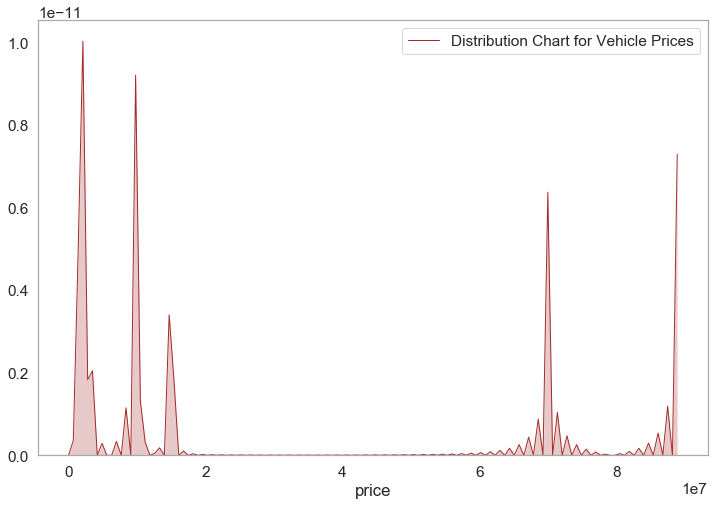

In [68]:
PlotDistributionOfColumn('price', 'Distribution Chart for Vehicle Prices', 'brown')

<br><p style="font-family: Calibri; font-size:1.75em;color:teal;">Remove outliers as distribution of price is skewed</p>

In [69]:
min_price = df_vehicles['price'].quantile(0.02)
max_price = df_vehicles['price'].quantile(0.98)
df_vehicles = df_vehicles[(df_vehicles.price >= min_price) & (df_vehicles.price <= max_price)]
print(df_vehicles.price.describe())

count   301,501.000
mean     13,758.365
std       8,976.915
min         950.000
25%       6,500.000
50%      11,990.000
75%      18,950.000
max      43,588.000
Name: price, dtype: float64


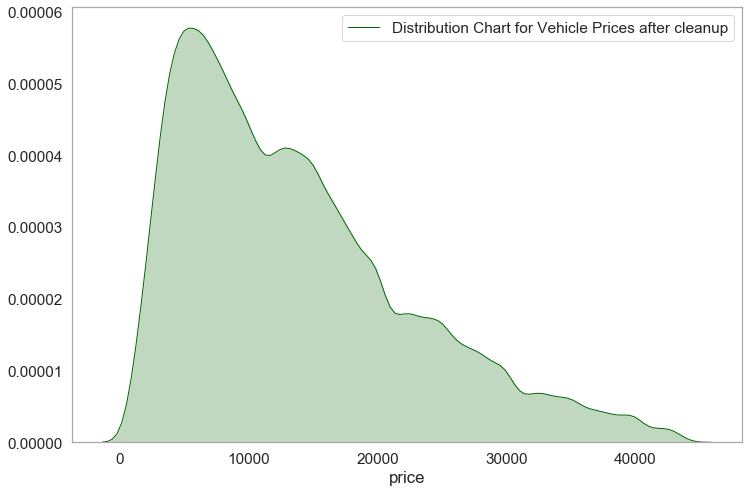

In [70]:
PlotDistributionOfColumn('price', 'Distribution Chart for Vehicle Prices after cleanup', 'darkgreen')

In [71]:
df_vehicles.shape

(301501, 13)

<br><p style="font-family: Calibri; font-size:1.75em;color:teal;">Distribution of Year of the Vehicle model</p>

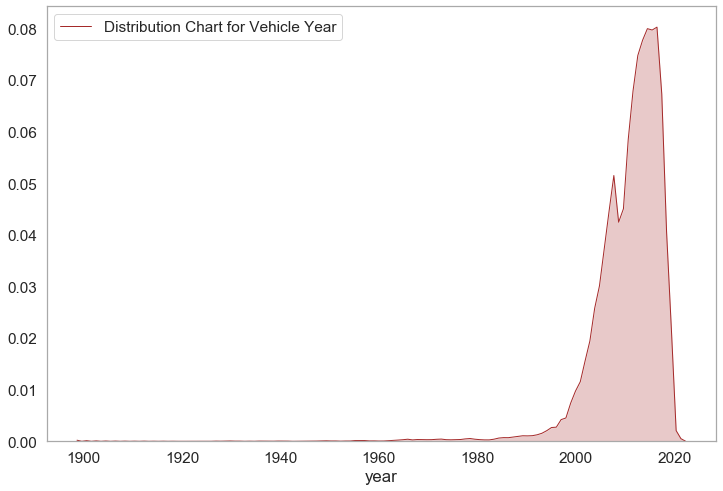

In [72]:
PlotDistributionOfColumn('year', 'Distribution Chart for Vehicle Year', 'brown')

<br><p style="font-family: Calibri; font-size:1.75em;color:teal;">Remove outliers in Vehicle Year as it is skewed</p>

In [73]:
min_year = df_vehicles.year.quantile(0.02)
max_year = df_vehicles.year.quantile(0.98)
df_vehicles = df_vehicles[(df_vehicles.year >= min_year) & (df_vehicles.year <= max_year)]

count   294,823.000
mean      2,011.389
std           5.147
min       1,994.000
25%       2,008.000
50%       2,012.000
75%       2,015.000
max       2,019.000
Name: year, dtype: float64
2012.0


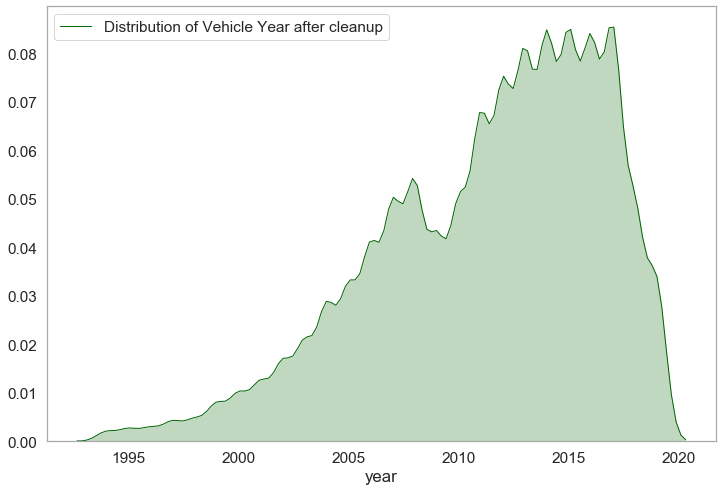

In [74]:
print(df_vehicles.year.describe())
print(df_vehicles.year.median())
PlotDistributionOfColumn('year', 'Distribution of Vehicle Year after cleanup', 'darkgreen')

<br><p style="font-family: Calibri; font-size:1.75em;color:teal;">Distribution of odometer readings in raw data</p>

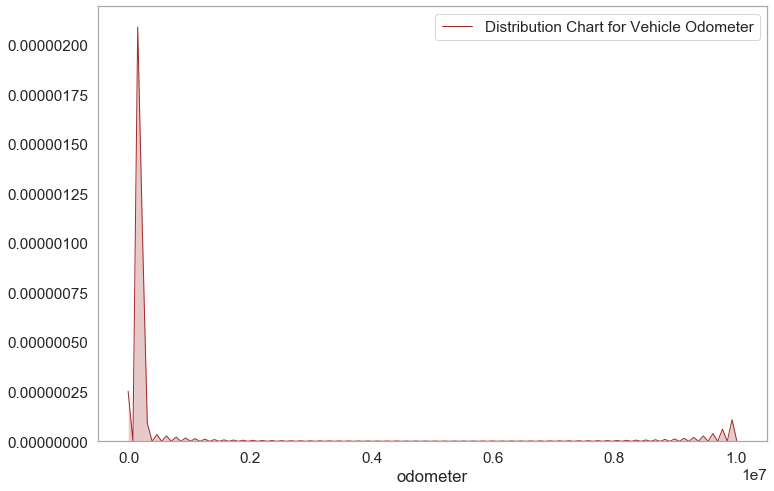

In [75]:
PlotDistributionOfColumn('odometer', 'Distribution Chart for Vehicle Odometer', 'brown')

<br><p style="font-family: Calibri; font-size:1.75em;color:teal;">Remove outliers in Vehicle Odometer as it is skewed</p>

In [76]:
min_odometer = df_vehicles.odometer.quantile(0.02)
max_odometer = df_vehicles.odometer.quantile(0.98)
df_vehicles = df_vehicles[(df_vehicles.odometer >= min_odometer) & (df_vehicles.odometer <= max_odometer)]

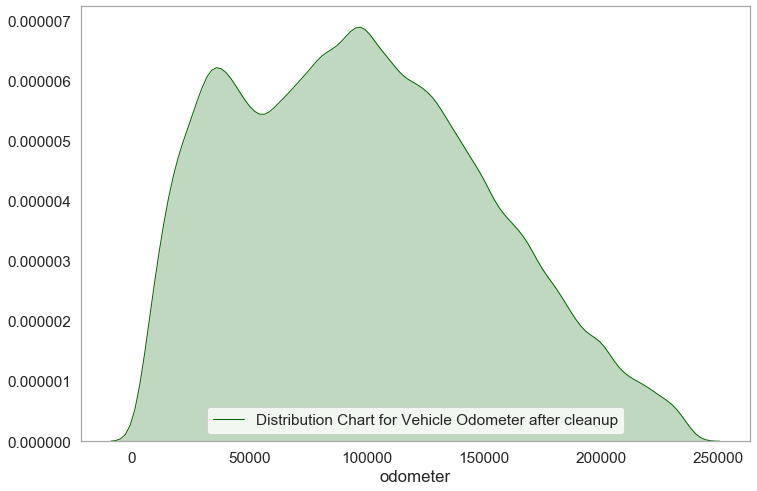

In [77]:
PlotDistributionOfColumn('odometer', 'Distribution Chart for Vehicle Odometer after cleanup', 'darkgreen')

In [78]:
print(list(df_vehicles))
print(df_vehicles.shape)
print(df_vehicles.describe())

['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'fuel', 'odometer', 'title_status', 'transmission', 'state', 'lat', 'long']
(283064, 13)
            price        year    odometer         lat        long
count 283,064.000 283,064.000 283,064.000 283,064.000 283,064.000
mean   13,890.476   2,011.524  97,862.485      38.758     -94.912
std     8,891.224       5.034  52,998.673       5.959      18.096
min       950.000   1,994.000   4,775.000     -83.197    -177.012
25%     6,900.000   2,008.000  54,099.750      34.847    -111.789
50%    11,995.000   2,012.000  95,000.000      39.354     -89.086
75%    18,990.000   2,015.000 135,500.000      42.680     -81.455
max    43,588.000   2,019.000 237,000.000      67.002     139.388


In [79]:
#df_vehicles.to_csv('Used_cars_cleaned.csv', index = False)

In [80]:
df_vehicles.head()

,region,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,state,lat,long
1,oregon coast,13750,"2,014.000",bmw,328i m-sport,good,gas,"76,237.000",clean,automatic,or,46.184,-123.824
2,greenville / upstate,2300,"2,001.000",dodge,caravan,excellent,gas,"199,000.000",clean,automatic,sc,34.935,-81.965
3,mohave county,9000,"2,004.000",chevrolet,colorado ls,excellent,gas,"54,000.000",clean,automatic,az,34.478,-114.271
7,maine,8500,"2,005.000",ford,mustang convertible,excellent,gas,"62,800.000",clean,automatic,me,44.207,-69.786
9,oregon coast,5950,"2,004.000",honda,"odyssey ex-l, reliable, e",unknown,gas,"102,415.000",rebuilt,automatic,or,45.577,-122.676


<br><p style="font-family: Calibri; font-size:2.25em;color:navy;">Analyze: Encode categorical values to numeric</p>

In [81]:
encoder = preprocessing.LabelEncoder()
categorical_features = ['manufacturer','model','condition','fuel','title_status','transmission','state']
df_vehicles[categorical_features] = df_vehicles[categorical_features].apply(encoder.fit_transform)

In [82]:
df_vehicles.describe()

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,state,lat,long
count,"283,064.000","283,064.000","283,064.000","283,064.000","283,064.000","283,064.000","283,064.000","283,064.000","283,064.000","283,064.000","283,064.000","283,064.000"
mean,"13,890.476","2,011.524",17.565,"9,654.322",2.871,1.941,"97,862.485",0.187,0.145,23.724,38.758,-94.912
std,"8,891.224",5.034,11.074,"5,286.603",2.456,0.619,"52,998.673",0.867,0.469,15.178,5.959,18.096
min,950.000,"1,994.000",0.000,0.000,0.000,0.000,"4,775.000",0.000,0.000,0.000,-83.197,-177.012
25%,"6,900.000","2,008.000",9.000,"5,219.000",0.000,2.000,"54,099.750",0.000,0.000,9.000,34.847,-111.789
50%,"11,995.000","2,012.000",12.000,"9,573.000",2.000,2.000,"95,000.000",0.000,0.000,23.000,39.354,-89.086
75%,"18,990.000","2,015.000",29.000,"14,558.000",6.000,2.000,"135,500.000",0.000,0.000,37.000,42.680,-81.455
max,"43,588.000","2,019.000",39.000,"18,956.000",6.000,4.000,"237,000.000",5.000,2.000,50.000,67.002,139.388


<br><p style="font-family: Calibri; font-size:2.25em;color:navy; font-style:bold">Analyze: Learn using multiple regression models<br></p>

In [83]:
features = ['year','manufacturer','model','condition','fuel','odometer','title_status','transmission','state','lat','long']
target = ['price']
df_vehicles_X = df_vehicles[features]
df_vehicles_y = df_vehicles[target]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_vehicles_X, df_vehicles_y, test_size = 0.33)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(189652, 11) (189652, 1)
(93412, 11) (93412, 1)


In [85]:
# Function to predict the target and return metrics
def PredictAndMeasure(regr_model):
    y_predicted = regr_model.predict(X_test)
    accuracy_train = round(regr_model.score(X_train, y_train), 3)
    accuracy_test = round(regr_model.score(X_test, y_test), 3)
    mae = round(metrics.mean_absolute_error(y_true = y_test, y_pred = y_predicted), 3)
    rmse = round(sqrt(metrics.mean_squared_error(y_true = y_test, y_pred = y_predicted)), 3)
    r2score = round(metrics.r2_score(y_true = y_test, y_pred = y_predicted), 3)
    return (accuracy_train, accuracy_test, mae, rmse, r2score)

def PrintMetrics(model_metrics):
    print("Accuracy of prediction in the training subset: {0}".format(model_metrics[0]))
    print("Accuracy of prediction in the test subset: {0}".format(model_metrics[1]))
    print("Mean Absolute Error: {0}".format(model_metrics[2]))
    print("Root Mean Squared Error: {0}".format(model_metrics[3]))
    print("R2 score: {0}".format(model_metrics[4]))

<p style="font-family: Calibri; font-size:1.75em;color: teal; font-style:bold">Model #1 - Linear Regression<br></p>

In [86]:
linear_regressor = LinearRegression(fit_intercept = True, normalize = True)
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [87]:
LR_metrics = PredictAndMeasure(linear_regressor)
PrintMetrics(LR_metrics)

Accuracy of prediction in the training subset: 0.48
Accuracy of prediction in the test subset: 0.477
Mean Absolute Error: 5011.117
Root Mean Squared Error: 6426.004
R2 score: 0.477


<p style="font-family: Calibri; font-size:1.75em;color: teal; font-style:bold">Model #2 - Decision Tree Regressor<br></p>

In [88]:
dtree_regressor = DecisionTreeRegressor()
dtree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [89]:
DT_metrics = PredictAndMeasure(dtree_regressor)
PrintMetrics(DT_metrics)

Accuracy of prediction in the training subset: 1.0
Accuracy of prediction in the test subset: 0.841
Mean Absolute Error: 1846.841
Root Mean Squared Error: 3543.326
R2 score: 0.841


<p style="font-family: Calibri; font-size:1.75em;color: teal; font-style:bold">Model #3 - Random Forest Regressor<br></p>

In [90]:
rforest_regressor = RandomForestRegressor(n_estimators = 100)
rforest_regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [91]:
RF_metrics = PredictAndMeasure(rforest_regressor)
PrintMetrics(RF_metrics)

Accuracy of prediction in the training subset: 0.988
Accuracy of prediction in the test subset: 0.917
Mean Absolute Error: 1493.196
Root Mean Squared Error: 2566.417
R2 score: 0.917


<p style="font-family: Calibri; font-size:1.75em;color: teal; font-style:bold">Model #4 - k Nearest Neighbours (kNN) Regression<br></p>

In [92]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [93]:
KNN_metrics = PredictAndMeasure(knn_regressor)
PrintMetrics(KNN_metrics)

Accuracy of prediction in the training subset: 0.759
Accuracy of prediction in the test subset: 0.614
Mean Absolute Error: 3706.016
Root Mean Squared Error: 5518.743
R2 score: 0.614


<p style="font-family: Calibri; font-size:1.75em;color: teal; font-style:bold">Model #5 - Elastic Net Regression<br></p>

In [94]:
enet_regressor = ElasticNet()
enet_regressor.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
EN_metrics = PredictAndMeasure(enet_regressor)
PrintMetrics(EN_metrics)

Accuracy of prediction in the training subset: 0.459
Accuracy of prediction in the test subset: 0.457
Mean Absolute Error: 5110.524
Root Mean Squared Error: 6547.959
R2 score: 0.457


<br><p style="font-family: Calibri; font-size:2.25em;color:navy;">Report: Regression Models Accuracy Comparison</p>

<p style="font-family: Calibri; font-size:1.75em;color:teal;">Measure #1: Accuracy</p>

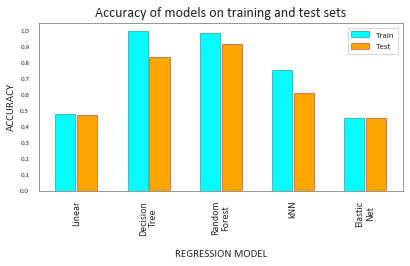

In [102]:
models = ['Linear', 'Decision\nTree', 'Random\nForest', 'kNN', 'Elastic\nNet']
accy_train_axis = [LR_metrics[0], DT_metrics[0], RF_metrics[0], KNN_metrics[0], EN_metrics[0]]
accy_test_axis = [LR_metrics[1], DT_metrics[1], RF_metrics[1], KNN_metrics[1], EN_metrics[1]]
xaxis_index = lib_np.arange(0, len(models))
bar_width = 0.28

fig, axes = lib_plt.subplots()
train_bar = axes.bar(xaxis_index - bar_width/1.85, accy_train_axis, bar_width, label = 'Train', color=['cyan'], edgecolor='teal', linewidth = 0.5)
test_bar = axes.bar(xaxis_index + bar_width/1.85, accy_test_axis, bar_width, label = 'Test', color=['orange'], edgecolor='brown', linewidth = 0.5)

lib_plt.rcParams['font.sans-serif'] = ['Calibri', 'sans-serif']
lib_plt.rcParams["axes.edgecolor"] = '0.2'
lib_plt.rcParams["axes.linewidth"] = '0.5'
lib_plt.rc('ytick', labelsize = 8)
axes.set_xlabel('\nREGRESSION MODEL', fontsize = 11)
axes.set_ylabel('ACCURACY', fontsize = 11)
axes.set_title('Accuracy of models on training and test sets', fontsize = 14)
axes.set_xticks(xaxis_index)
axes.set_xticklabels(models, rotation = 90, fontsize = 10)
axes.set_yticks(lib_np.arange(0.0, 1.1, step = 0.1))
axes.legend(loc = 'best', fontsize = 9, facecolor='white')
axes.set_facecolor('white')
axes.grid(False)
fig.tight_layout()
lib_plt.savefig("models_accuracy_comparison.png", figsize = (12,9), dpi = 600)
lib_plt.show()

<p style="font-family: Calibri; font-size:1.75em;color:teal;">Measure #2: Error</p>

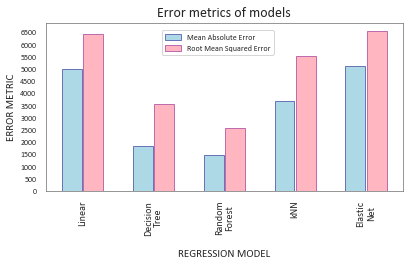

In [97]:
mae_axis = [LR_metrics[2], DT_metrics[2], RF_metrics[2], KNN_metrics[2], EN_metrics[2]]
rmse_axis = [LR_metrics[3], DT_metrics[3], RF_metrics[3], KNN_metrics[3], EN_metrics[3]]

fig, axes = lib_plt.subplots()
mae_bar = axes.bar(xaxis_index - bar_width/1.85, mae_axis, bar_width, label = 'Mean Absolute Error', color=['lightblue'], edgecolor='navy', linewidth = 0.5)
rmse_bar = axes.bar(xaxis_index + bar_width/1.85, rmse_axis, bar_width, label = 'Root Mean Squared Error', color=['lightpink'], edgecolor='purple', linewidth = 0.5)

lib_plt.rc('ytick', labelsize = 8)
axes.set_xlabel('\nREGRESSION MODEL', fontsize = 11)
axes.set_ylabel('ERROR METRIC', fontsize = 11)
axes.set_title('Error metrics of models', fontsize = 14)
axes.set_xticks(xaxis_index)
axes.set_xticklabels(models, rotation = 90, fontsize = 10)
axes.set_yticks(lib_np.arange(0, 7000, step = 500))
axes.legend(loc = 'best', bbox_to_anchor=(0.14, 0.38, 0.51, 0.6), fontsize = 8, facecolor='white')
axes.set_facecolor('white')
axes.grid(False)
fig.tight_layout()
lib_plt.savefig("models_error_comparison.png", figsize = (12,9), dpi = 600)
lib_plt.show()

<br><p style="font-family: Calibri; font-size:2.25em;color:navy;">Report: Correlation of features with target (price)</p>

In [98]:
df_combined = lib_pd.concat([df_vehicles_X, df_vehicles_y], axis = 1)
corr_with_price = lib_pd.DataFrame(df_combined.corr().price.drop('price')).reset_index()
print(corr_with_price)

           index  price
0           year  0.581
1   manufacturer -0.032
2          model  0.037
3      condition  0.163
4           fuel -0.165
5       odometer -0.540
6   title_status -0.077
7   transmission  0.107
8          state  0.005
9            lat  0.076
10          long -0.149


In [99]:
corr_with_price = corr_with_price.rename(columns={'index':'feature', 'price':'corr'})
corr_with_price = corr_with_price.iloc[(-corr_with_price['corr'].abs()).argsort()].reset_index(drop = True)

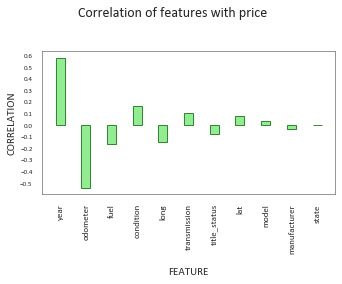

In [100]:
feature_axis = corr_with_price['feature'].values
corr_axis = corr_with_price['corr'].values
lib_plt.rcParams['font.sans-serif'] = ['Calibri', 'sans-serif']
lib_plt.rcParams["axes.edgecolor"] = '0.2'
lib_plt.rcParams["axes.linewidth"] = '0.5'
lib_plt.rc('xtick', labelsize = 9)
lib_plt.rc('ytick', labelsize = 7)
lib_plt.xlabel('\nFEATURE', fontsize = 11)
lib_plt.ylabel('CORRELATION', fontsize = 11)
lib_plt.suptitle('Correlation of features with price', fontsize = 14)
lib_plt.xticks(rotation = 90)
lib_plt.yticks(lib_np.arange(-0.7, 0.7, step = 0.1))
lib_plt.tight_layout(3)
lib_plt.bar(feature_axis, corr_axis, width = 0.35, linewidth = 0.75, color=['lightgreen'], edgecolor='darkgreen')
lib_plt.savefig("corr_with_price.png", figsize = (12,9), dpi = 600)
lib_plt.show()

<br><p style="font-family: Calibri; font-size:1.0em;color:#444444;">End of notebook</p>